# Raport z zadania metoda gradientu prostego
## Import bibliotek

In [1]:
from functions import f1, gradient_f1, f2, gradient_f2
from plotter import plotter_1D, plotter_2D, plotter_3D
from gradientdescent import GradientDescent
from experiment import experiment_serie, create_table, create_summary
from tabulate import tabulate
import numpy as np

## Wykresy zadanych funkcji

### Funkcja 1

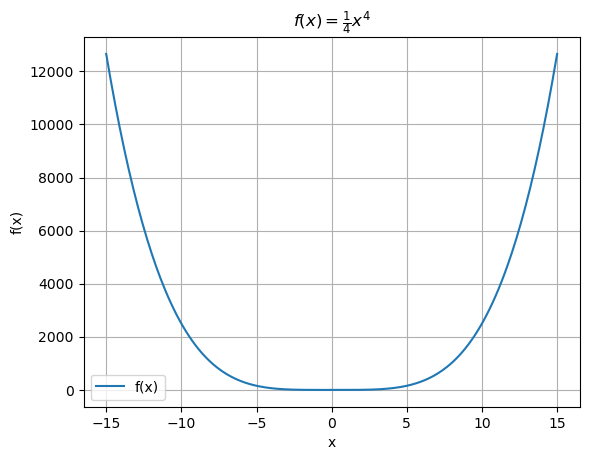

In [10]:
plotter_1D(f1, domain=(-15, 15), num_points=300, title="$f(x) = \\frac{1}{4}x^4$", x_label='x', y_label='f(x)', legend_label="f(x)")

### Funkcja 2

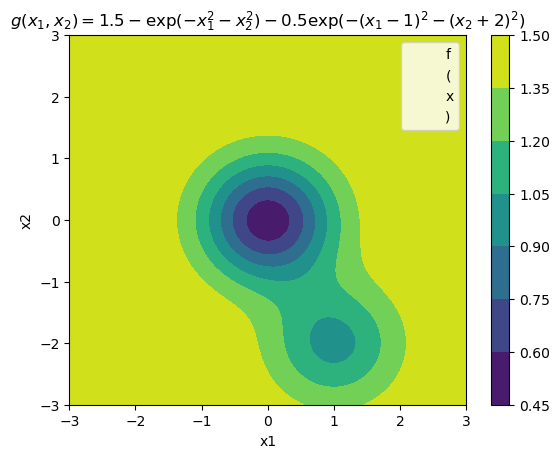

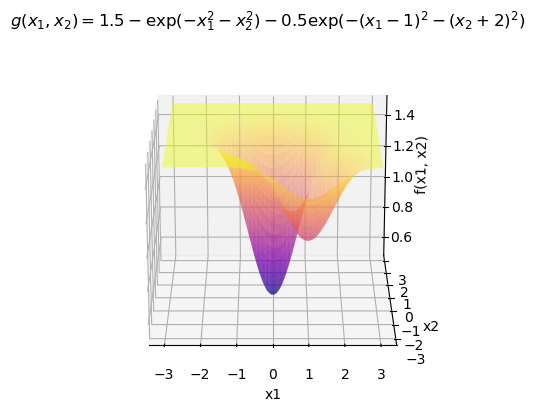

In [13]:
plotter_2D(f2, domain=[(-3, 3), (-3, 3)], title="$g(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")
plotter_3D(f2, domain=[(-3, 3), (-3, 3)], view=(20, -90), title="$g(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")

# Cel eksperymentów
Zamierzam sprawdzić działanie algorytmów dla różnych punktów startowych oraz hiperparametrów. Przeprowadzę badanie:
- 10 losowo wybranych punktów startowych
- 6 różnych wartości kroku gradientu (step/learning rate)
- 3 różnych liczb iteracji<br>

Spośród wyników dla każdej funkcji wyłonię najlepszą oraz najgorszą wartość i poddam je dalszej analizie.

## Funkcja 1
### Tabela wyników wszystkich eksperymentów

In [4]:
DOMAIN = (-4, 4)
START_POINTS = np.random.uniform(DOMAIN[0], DOMAIN[1], 10)
STEP_SIZES = (0.005, 0.01, 0.03, 0.05, 0.1, 0.12)
ITERATION_NUMBERS = (10000, 15000, 20000)
CORRECT_VALUE = 0
results, best, worst = experiment_serie(START_POINTS, f1, gradient_f1, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
print(tabulate(table, headers="keys", tablefmt="fancy_grid"))

╒═════════════════════╤═════════════╤════════════════════════╤═══════════════════╤════════════╤═════════════╤═══════════════╕
│   Experiment number │   Step size │   Number of iterations │   Starting points │      End x │       End y │   Error value │
╞═════════════════════╪═════════════╪════════════════════════╪═══════════════════╪════════════╪═════════════╪═══════════════╡
│                   1 │       0.005 │                  10000 │          0.615532 │  0.0986927 │ 2.37181e-05 │     0.0986927 │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────┼────────────┼─────────────┼───────────────┤
│                   2 │       0.005 │                  10000 │          0.230779 │  0.0917508 │ 1.77166e-05 │     0.0917508 │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────┼────────────┼─────────────┼───────────────┤
│                   3 │       0.005 │                  10000 │         -2.72947  │ -0.0999081 │ 2.49082e-05 │     0.09

### Tabela średniej wartości błędu dla każdej kombinacji kroku gradientu i liczby iteracji

In [5]:
summary = create_summary(results[0], results[1], results[2], table)
print(tabulate(summary, headers="keys", tablefmt="fancy_grid"))

╒═════════════╤════════════════════╤═════════════════╕
│   Step size │   Iteration number │   Error average │
╞═════════════╪════════════════════╪═════════════════╡
│       0.005 │              10000 │       0.0977887 │
├─────────────┼────────────────────┼─────────────────┤
│       0.005 │              15000 │       0.080394  │
├─────────────┼────────────────────┼─────────────────┤
│       0.005 │              20000 │       0.0698768 │
├─────────────┼────────────────────┼─────────────────┤
│       0.01  │              10000 │       0.0698695 │
├─────────────┼────────────────────┼─────────────────┤
│       0.01  │              15000 │       0.0572662 │
├─────────────┼────────────────────┼─────────────────┤
│       0.01  │              20000 │       0.0496917 │
├─────────────┼────────────────────┼─────────────────┤
│       0.03  │              10000 │       0.0406479 │
├─────────────┼────────────────────┼─────────────────┤
│       0.03  │              15000 │       0.0332359 │
├─────────

### Wykresy przejścia gradientu dla najlepszego oraz najgorszego wyniku


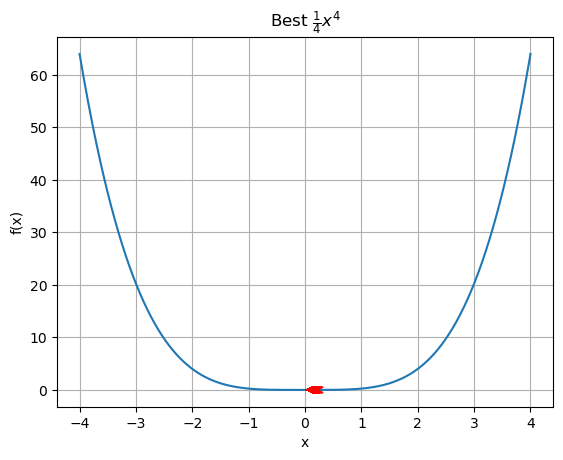

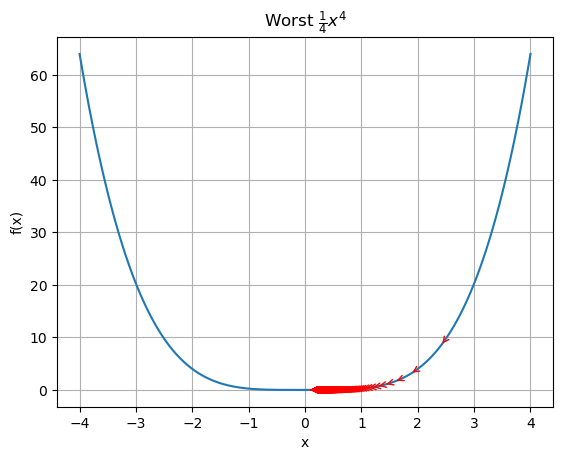

In [6]:
plotter_1D(f1, DOMAIN, best[0], best[1], num_points=500, title="Best $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)
plotter_1D(f1, DOMAIN, worst[0], worst[1], num_points=500, title="Worst $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)

## Funkcja 2

In [7]:
DOMAIN = [(-4, 4), (-4, 4)]
START_POINTS = []
for _ in range(10):
    x1 = np.random.uniform(DOMAIN[0][0], DOMAIN[0][1])
    x2 = np.random.uniform(DOMAIN[1][0], DOMAIN[1][1])
    START_POINT = np.array([x1, x2])
    START_POINTS.append(START_POINT)
STEP_SIZES = (0.005, 0.01, 0.03, 0.06, 0.1, 0.2)
ITERATION_NUMBERS = (5000, 10000, 15000)
CORRECT_VALUE = [0, 0]
results, best, worst = experiment_serie(START_POINTS, f2, gradient_f2, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
print(tabulate(table, headers="keys", tablefmt="fancy_grid"))


╒═════════════════════╤═════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════╤══════════╤═══════════════╕
│   Experiment number │   Step size │   Number of iterations │ Starting points           │ End x                     │    End y │   Error value │
╞═════════════════════╪═════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════╪══════════╪═══════════════╡
│                   1 │       0.005 │                   5000 │ [ 1.05782028 -2.08791021] │ [ 0.98451006 -1.96902012] │ 0.992742 │     2.20143   │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────────────┼───────────────────────────┼──────────┼───────────────┤
│                   2 │       0.005 │                   5000 │ [ 2.17275852 -0.7290476 ] │ [ 0.98451006 -1.96902011] │ 0.992742 │     2.20143   │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────────────┼───────────────────────────┼──────

### Tabela średniej wartości błędu dla każdej kombinacji kroku gradientu oraz liczby iteracji

In [8]:
summary = create_summary(results[0], results[1], results[2], table)
print(tabulate(summary, headers="keys", tablefmt="fancy_grid"))

╒═════════════╤════════════════════╤═════════════════╕
│   Step size │   Iteration number │   Error average │
╞═════════════╪════════════════════╪═════════════════╡
│       0.005 │               5000 │         2.47469 │
├─────────────┼────────────────────┼─────────────────┤
│       0.005 │              10000 │         2.28913 │
├─────────────┼────────────────────┼─────────────────┤
│       0.005 │              15000 │         2.28772 │
├─────────────┼────────────────────┼─────────────────┤
│       0.01  │               5000 │         2.28913 │
├─────────────┼────────────────────┼─────────────────┤
│       0.01  │              10000 │         2.28618 │
├─────────────┼────────────────────┼─────────────────┤
│       0.01  │              15000 │         2.28263 │
├─────────────┼────────────────────┼─────────────────┤
│       0.03  │               5000 │         2.28263 │
├─────────────┼────────────────────┼─────────────────┤
│       0.03  │              10000 │         2.26354 │
├─────────

### Wykresy przejścia gradientu dla najlepszego oraz najgorszego wyniku

/root/WSI/szymczyk_aleksander_wsi23z/Zad1/plotter.py:110: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(X1, X2, Z, cmap='viridis', label=legend_label)


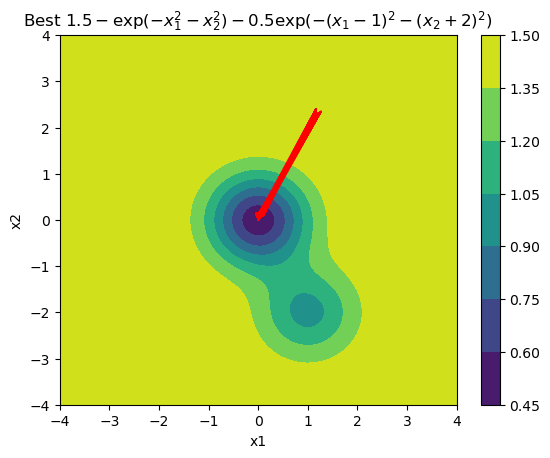

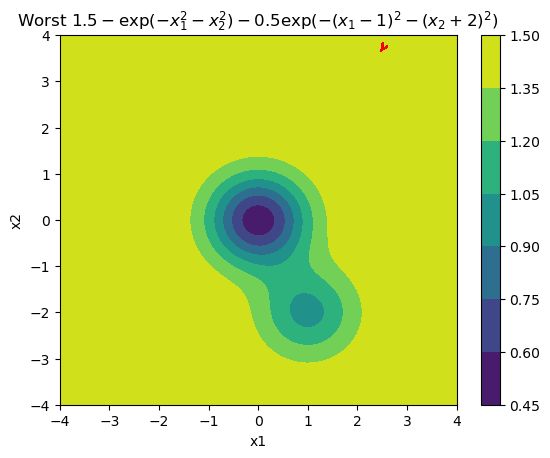

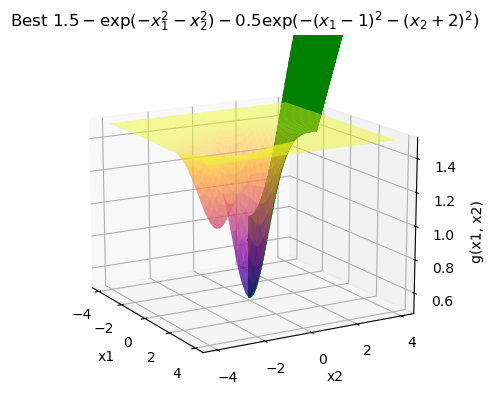

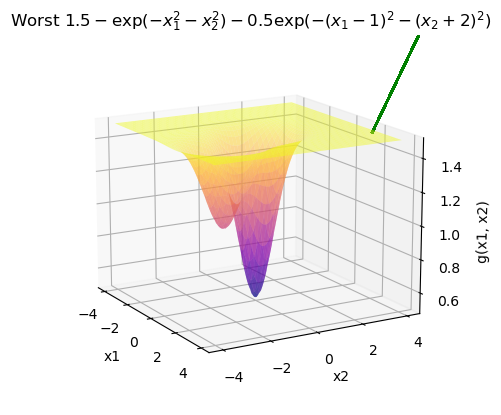

In [9]:
plotter_2D(f2, DOMAIN, best[0], num_points=500, title="Best $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$",
           x1_label="x1", x2_label="x2", steps=True)
plotter_2D(f2, DOMAIN, worst[0], num_points=500,
           title="Worst $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", steps=True)
plotter_3D(f2, DOMAIN, best[0], best[1], num_points=500,
           title="Best $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", x3_label="g(x1, x2)", steps=True)
plotter_3D(f2, DOMAIN, worst[0], worst[1], num_points=500,
           title="Worst $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", x3_label="g(x1, x2)", steps=True)

# Wyniki i wnioski
## Funkcja 1
### Wyniki dla pojedynczych punktów
Wyniki dla pierwszej funkcji pokazują, że największym problemem dla alogrytmu okazało się 'płaskie' otoczenie minimum funkcji. Punkty, które wygenerowały się daleko od minimum początkowo szybko kierowały się w jego stronę, jednak im były bliżej tym wartość gradientu gwałtownie się zmniejszała. \
Z tego też powodu najlepsze wyniki algorytm osiągał dla punktów startowych jak najbliższych minimum.
### Wyniki dla hiperparametrów
Najmniejszy średni błąd algorytm osiągnął dla beta=0.12 oraz liczby iteracji=20000. Ogólnie rzecz biorąc zwiększenie liczby iteracji dla tej samej wartości kroku gradientu zawsze zwiększało efektywność działania algorytmu. Również większy krok zawsze wpływał pozytywnie na wynik, jednak zwiększenie go zbyt mocno mogłoby skutkować zjawiskiem eksplozji gradientu. 
## Funkcja 2
### Wyniki dla pojedynczych punktów
Na wyniki algorytmu dla drugiej funkcji bardzo duży wpływ miał punkt startowy. Gdy był on zbyt daleko od minimum (lokalnego lub globalnego) dla niektórych punktów żadna wartość kroku gradientu czy liczba iteracji nie była w stanie przybliżyć początkowej wartości do minimum \- po całym przejściu algorytmu wartość funkcji pozostawała na poziomie g(x1, x2) = 1.5. \
W przypadku gdy początkowy punkt znajdował się w pobliżu minimum lokalnego to również niezależnie od testowanego kroku gradientu oraz liczby iteracji algorytm nie mógł się z niego wydostać osiągając g(x1, x2) = 0.992742.\
Jednakże części punktów, które dla mniejszych hiperparametrów przyjmowały wartość 1.5 udało się dotrzeć do minimum lokalnego, gdy zwiększony został krok gradientu oraz liczba iteracji.\
Warto zaznaczyć, że gdy algorytm poprawnie kierował się do minimum to wyznaczał je bardzo dokładnie, niezależnie od wartości hiperparametrów.
### Wyniki dla hiperparametrów
Najmniejszy błąd średni algorytm również osiągnął dla beta=0.2 oraz liczby iteracji=20000. Zwiększenie liczby iteracji oraz kroku gradientu pozytywnie wpływało na wynik, jednak różnice pomiędzy wartościami błędu dla poszczególnych kombinacji hiperparametrów były niewielkie. Punkty w pobliżu minimum były bardzo dokładnie wyznaczone nawet przy najmniejszych hiperparametrach, lecz te większe były w stanie poprawnie przeprowadzić zejście gradientu również na niektórych punktach dalej oddalonych od minimum.